In [18]:
import numpy as np
import matplotlib.pyplot as plt
actions = ['rock', 'paper', 'scissors']
states = [(a, b) for a in actions for b in actions]
Q_table = np.zeros((len(states), len(actions)))
states

[('rock', 'rock'),
 ('rock', 'paper'),
 ('rock', 'scissors'),
 ('paper', 'rock'),
 ('paper', 'paper'),
 ('paper', 'scissors'),
 ('scissors', 'rock'),
 ('scissors', 'paper'),
 ('scissors', 'scissors')]

Learned Q-table:


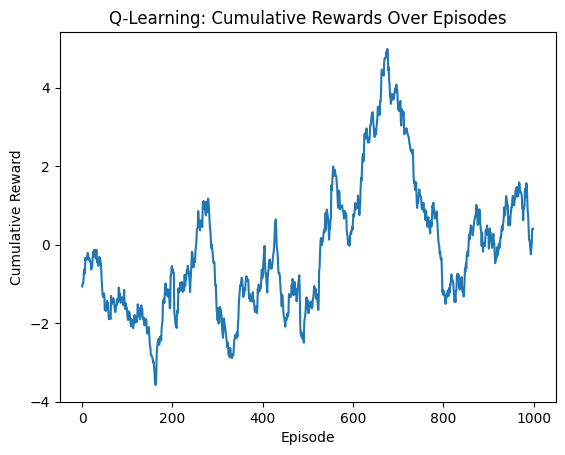

(array([[ 0.12534533, -0.11255292, -0.21070299],
        [ 0.11030392, -0.10136158, -0.14344974],
        [-0.19126734, -0.35487284, -0.00596732],
        [-0.14013496,  0.18757958, -0.13644945],
        [ 0.06854049,  0.09648009,  0.7574372 ],
        [-0.0378838 , -0.26572826,  0.04295962],
        [ 0.12127703,  0.39594219, -0.03740795],
        [-0.25722556,  0.44106977, -0.14597276],
        [-0.12372398,  0.22913797,  0.08512129]]),
 ['rock', 'paper', 'scissors'],
 [('rock', 'rock'),
  ('rock', 'paper'),
  ('rock', 'scissors'),
  ('paper', 'rock'),
  ('paper', 'paper'),
  ('paper', 'scissors'),
  ('scissors', 'rock'),
  ('scissors', 'paper'),
  ('scissors', 'scissors')])

In [40]:
learning_rate = 0.1
discount_factor = 0.9
exploration_prob = 0.2
num_episodes = 1000
cumulative_rewards = []
def choose_action(state):
    if np.random.uniform(0, 1) < exploration_prob:
        return np.random.choice(len(actions))
    else:
        return np.argmax(Q_table[state])
    
def update_Q_table(state, action, reward, next_state):
    best_next_action = np.argmax(Q_table[next_state])
    Q_table[state, action] += learning_rate * (reward + discount_factor * Q_table[next_state, best_next_action] - Q_table[state, action])

for episode in range(num_episodes):
    current_state = np.random.randint(len(states))
    while True:
        action = choose_action(current_state)
        opponent_action = np.random.choice(len(actions))
        if (actions[action], actions[opponent_action]) in [('rock', 'scissors'), ('paper', 'rock'), ('scissors', 'paper')]:
            reward = 1
        elif (actions[opponent_action], actions[action]) in [('rock', 'scissors'), ('paper', 'rock'), ('scissors', 'paper')]:
            reward = -1
        else:
            reward = 0
        next_state = opponent_action
        update_Q_table(current_state, action, reward, next_state)
        current_state = next_state
        if np.random.uniform(0, 1) < exploration_prob:
            break
    cumulative_reward = np.sum(Q_table)
    cumulative_rewards.append(cumulative_reward)
print("Learned Q-table:")
plt.plot(cumulative_rewards)
plt.title('Q-Learning: Cumulative Rewards Over Episodes')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()
Q_table,actions,states

In [27]:
import numpy as np
def play_game(Q_table):
    current_state = np.random.randint(len(states))

    while True:
        action = np.argmax(Q_table[current_state])
        opponent_action = np.random.choice(len(actions))
        print(f"Agent: {actions[action]}, Opponent: {actions[opponent_action]}")
        if (actions[action], actions[opponent_action]) in [('rock', 'scissors'), ('paper', 'rock'), ('scissors', 'paper')]:
            print("Agent wins!")
        elif (actions[opponent_action], actions[action]) in [('rock', 'scissors'), ('paper', 'rock'), ('scissors', 'paper')]:
            print("Agent loses!")
        else:
            print("It's a draw!")
        next_state = opponent_action
        if np.random.uniform(0, 1) < exploration_prob:
            break
play_game(Q_table)


Agent: paper, Opponent: paper
It's a draw!
Agent: paper, Opponent: paper
It's a draw!
Agent: paper, Opponent: rock
Agent wins!
Agent: paper, Opponent: scissors
Agent loses!
Agent: paper, Opponent: rock
Agent wins!


In [41]:
for each in zip(Q_table,states):
    ind=int(np.argmax(each[0]))
    print(each[1],actions[ind])

('rock', 'rock') rock
('rock', 'paper') rock
('rock', 'scissors') scissors
('paper', 'rock') paper
('paper', 'paper') scissors
('paper', 'scissors') scissors
('scissors', 'rock') paper
('scissors', 'paper') paper
('scissors', 'scissors') paper
